# Bar chart as an effective alternative to a pie chart

In this exercise, we will visualize the distribution of different categories in a data set. We'll start with a pie chart, understand its problems, and will evolve into a neat summary graph.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
tbl_movies = pd.read_csv('data/tmdb_5000_movies.csv')
tbl_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
import json

In [5]:
def get_genre(genres):
    genres = sorted(json.loads(genres), key=lambda d: d['id'])
    if len(genres) > 0:
        return genres[0]['name']
    else:
        return 'N/A'
tbl_movies['genre'] = tbl_movies['genres'].apply(get_genre)

In [6]:
genre_counts = pd.value_counts(tbl_movies['genre']).sort_index()
genre_counts

Action              352
Adventure           790
Animation            99
Comedy              634
Crime                 2
Documentary          86
Drama              2019
Family                7
Fantasy             234
History              11
Horror              381
Music                 7
N/A                  28
Romance               5
Science Fiction      17
Thriller            108
War                   2
Western              21
Name: genre, dtype: int64

Text(0.5,1,"Please don't")

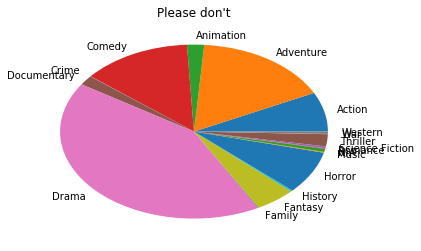

In [7]:
fig, ax = plt.subplots()
ax.pie(genre_counts, labels=genre_counts.index);
ax.set_title("Please don't")

Text(0.5,1,"Still don't")

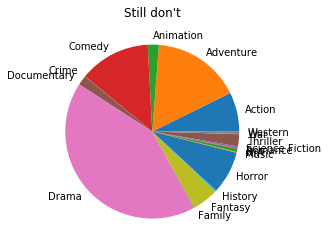

In [9]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.pie(genre_counts, labels=genre_counts.index);
ax.set_title("Still don't")

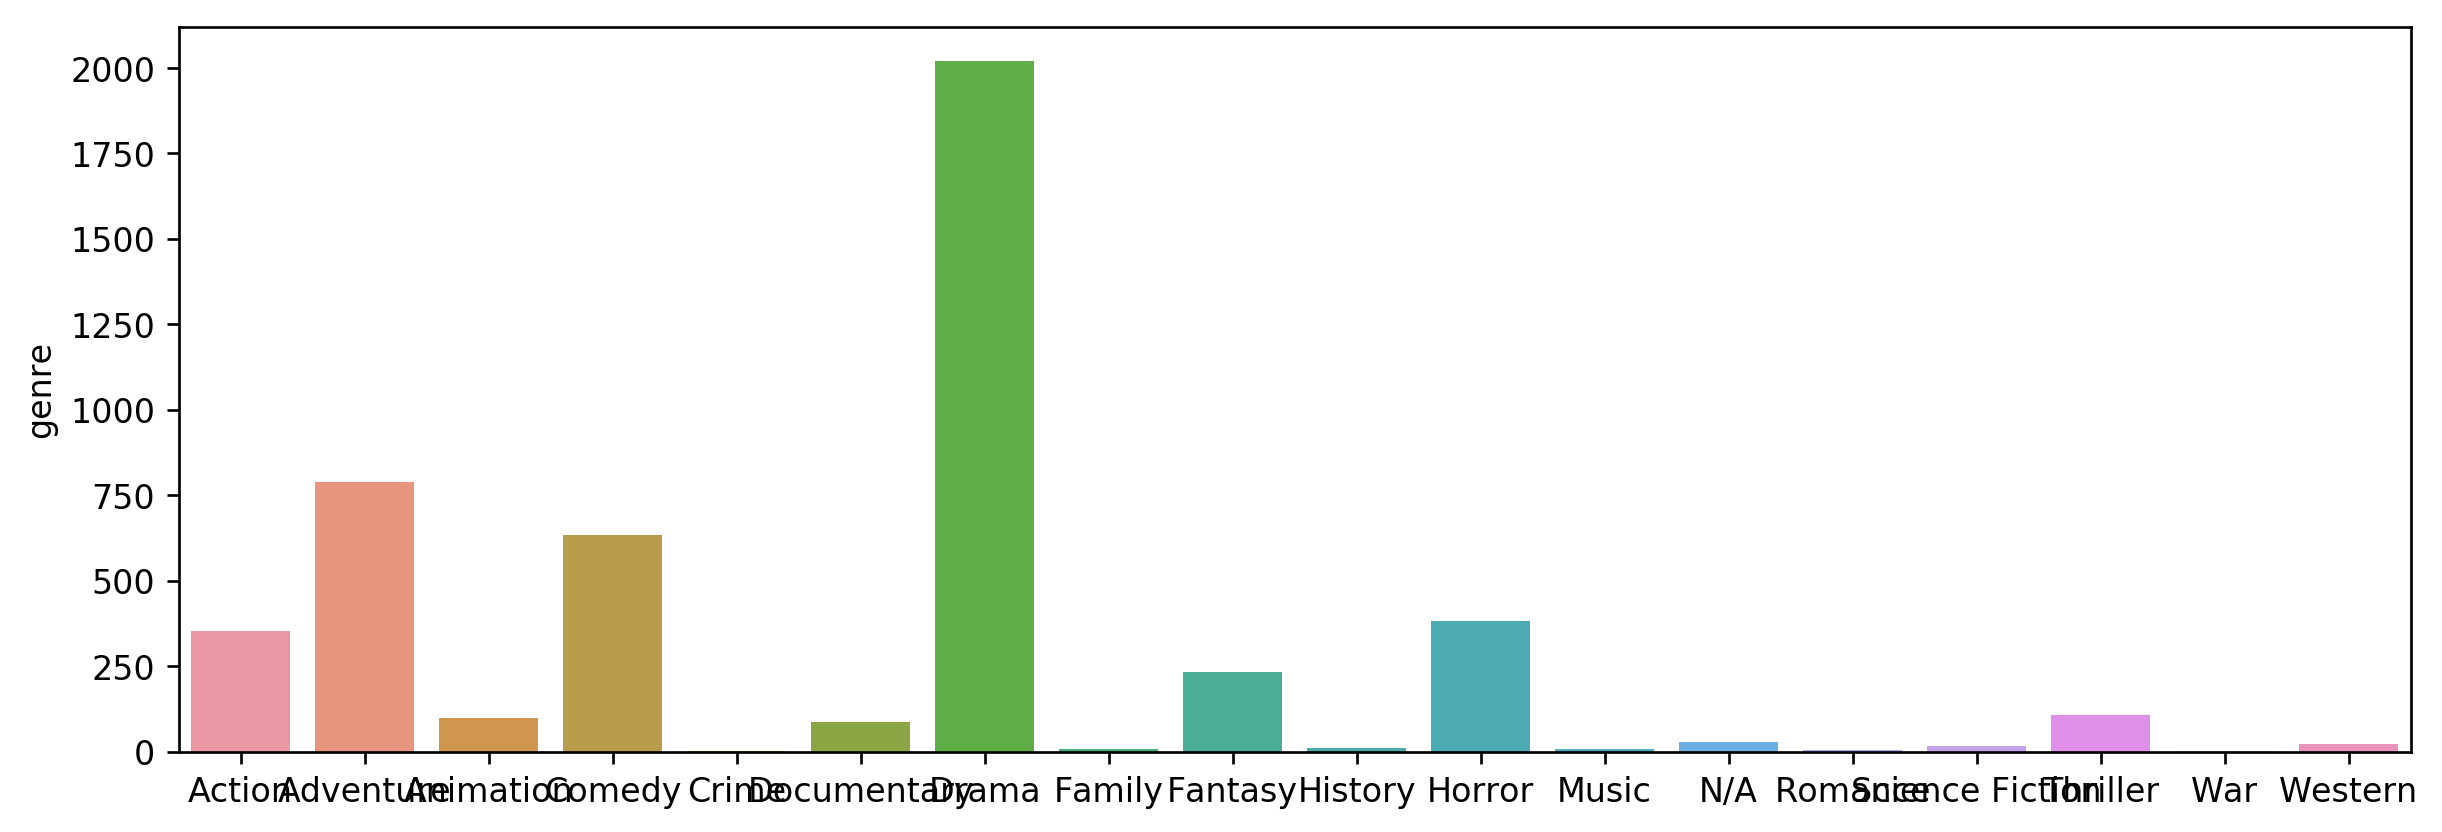

In [10]:
# Make a bar chart using the same data
fig, ax = plt.subplots(figsize=(12, 4), dpi=240)
sns.barplot(x=genre_counts.index, y=genre_counts)

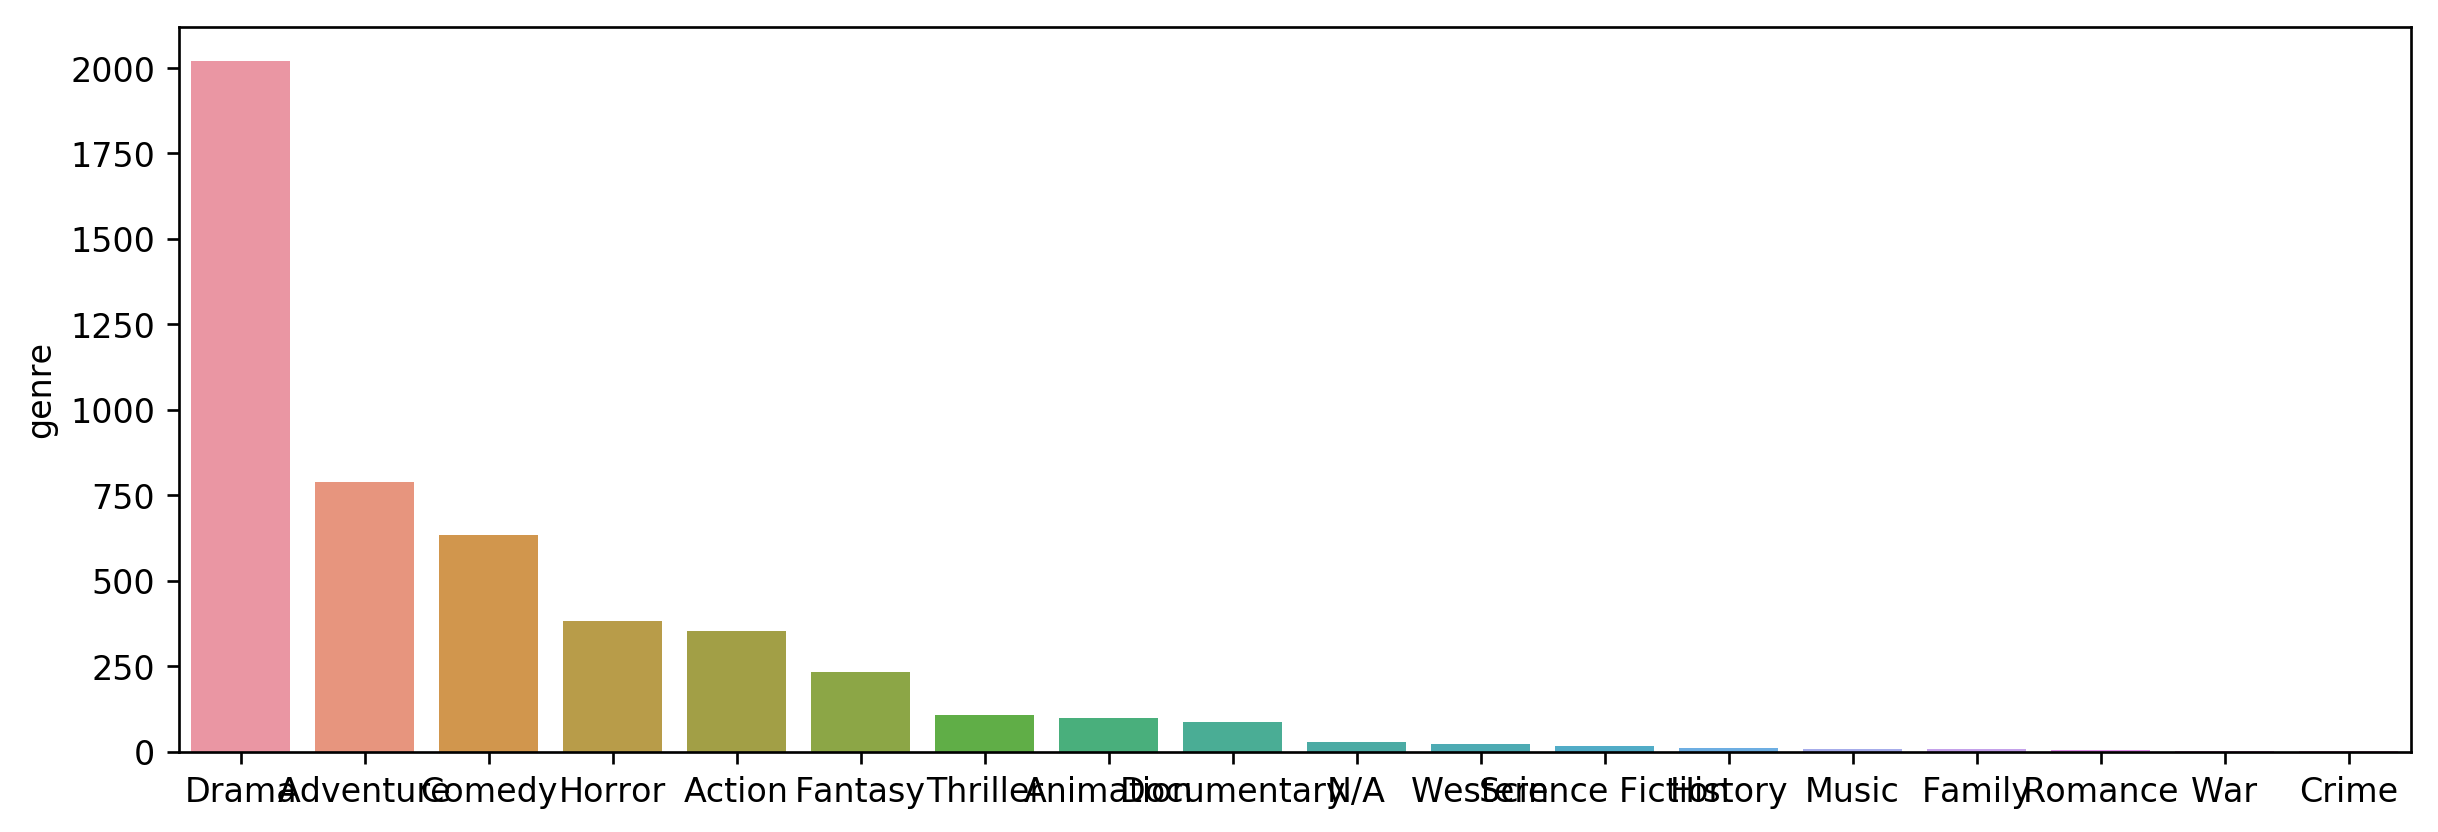

In [11]:
#! Sorting improves readability
genre_counts = genre_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 4), dpi=240)
sns.barplot(x=genre_counts.index, y=genre_counts)

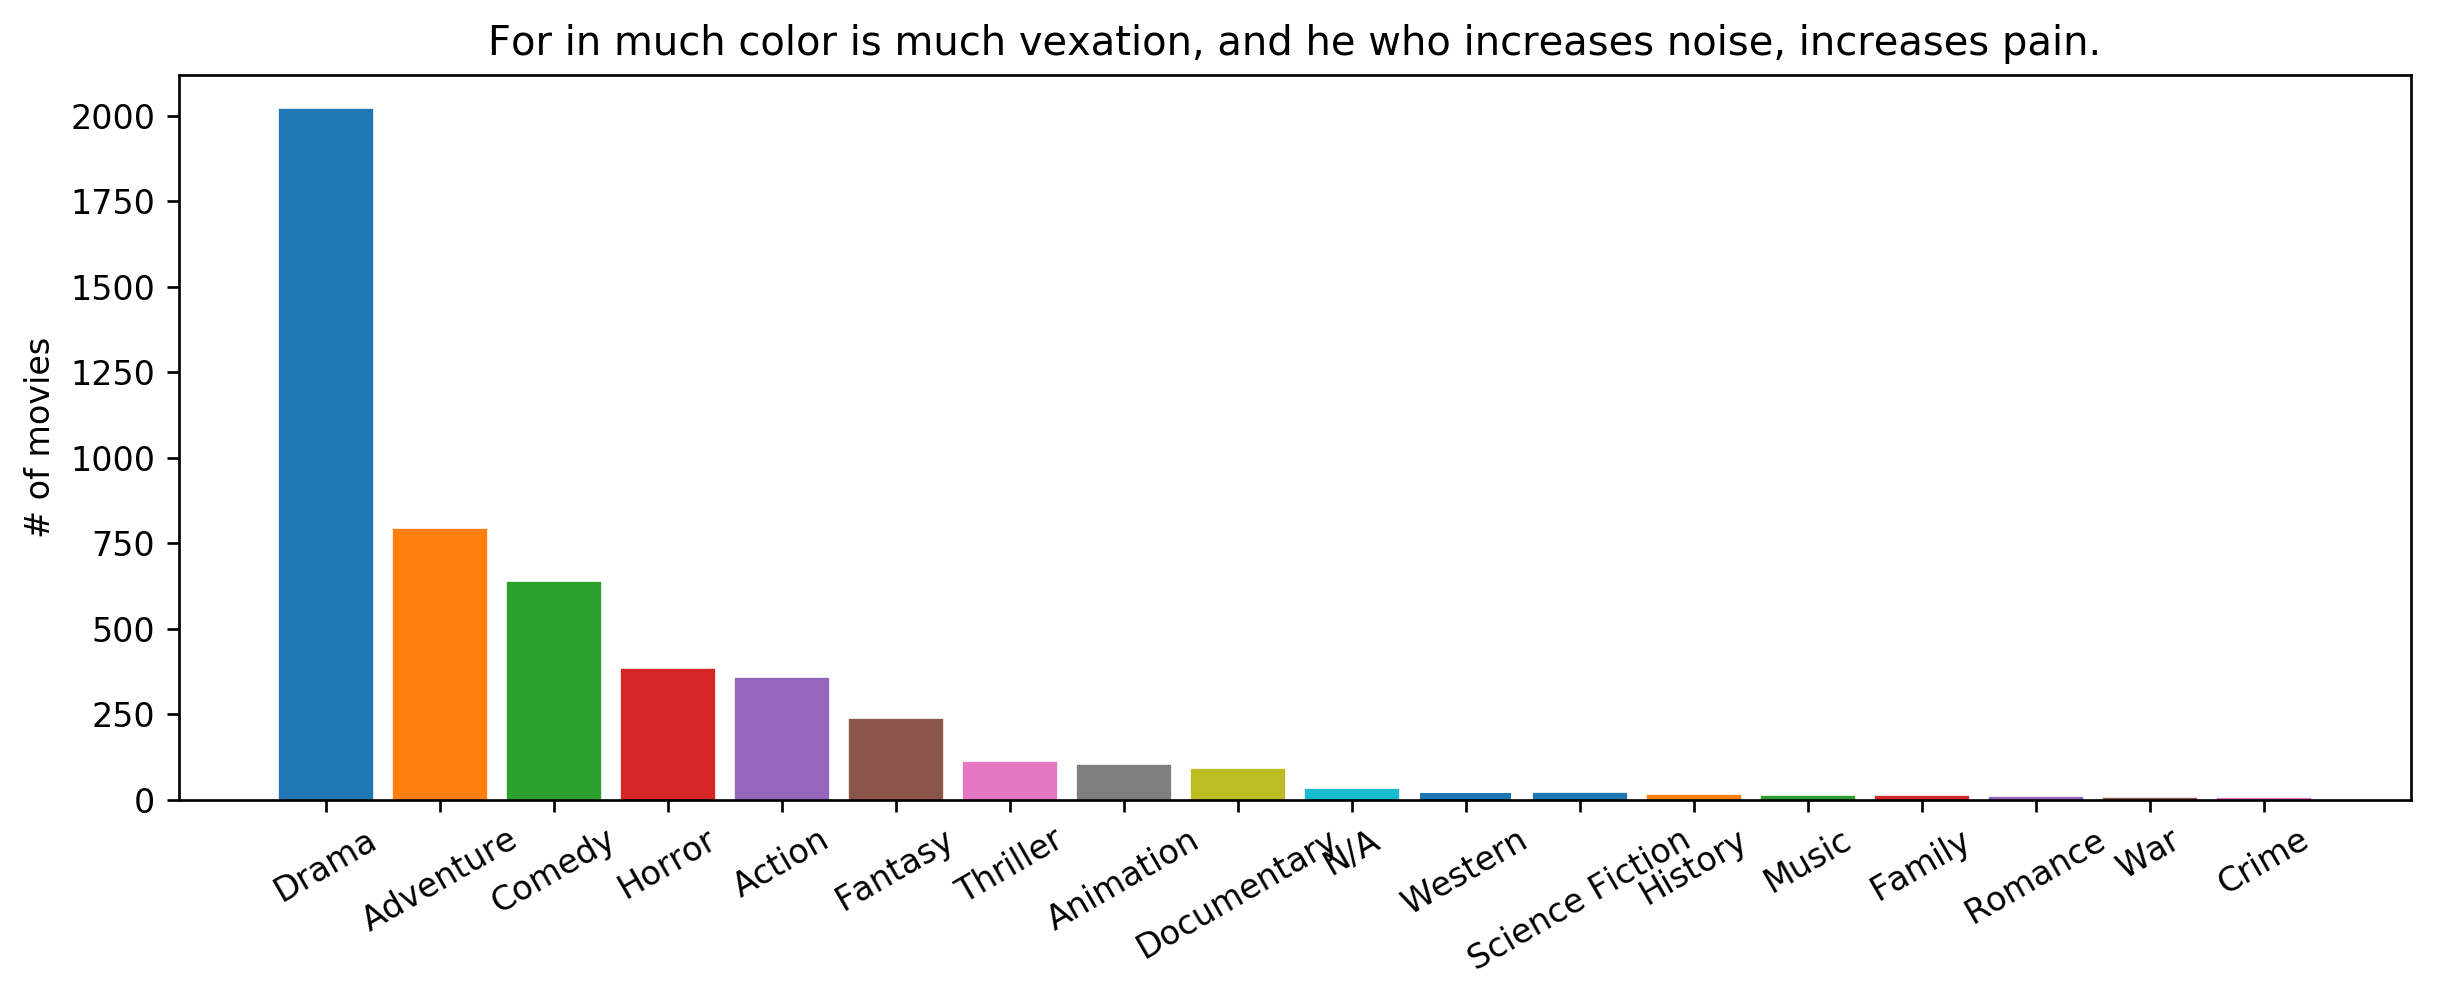

In [13]:
# "vanila matplotlib" version (sort of)
fig, ax = plt.subplots(figsize=(12, 4), dpi=240)
y = list(range(len(genre_counts)))
bars = ax.bar(
     y,
     genre_counts,
)
i=0
for b in bars:
    try:
        b.set_color(f'C{i}')
    except :
        i = 0
    else:
        i += 1
ax.set_xticks(range(len(genre_counts)))
ax.set_xticklabels(genre_counts.index, rotation=30)
ax.set_ylabel('# of movies')
ax.set_title("For in much color is much vexation, and he who increases noise, increases pain.")
None

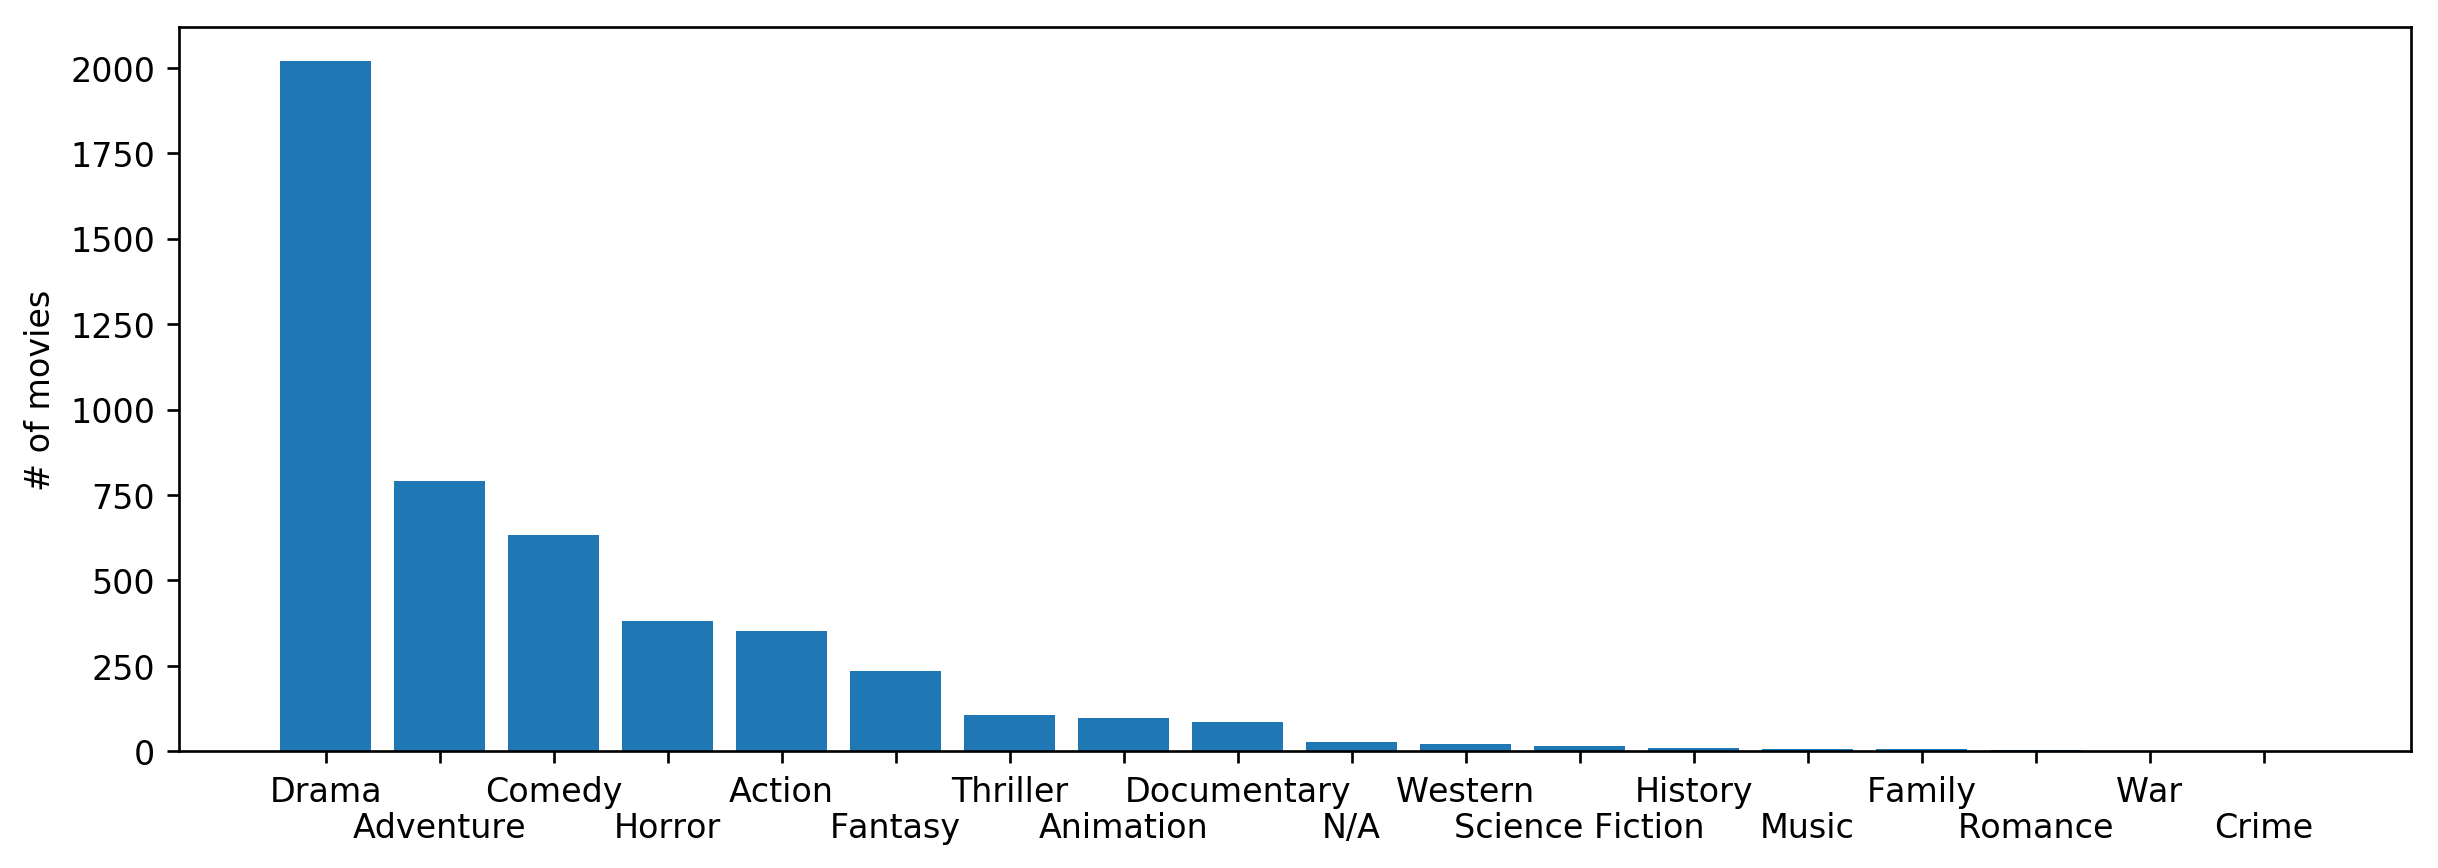

In [14]:
fig, ax = plt.subplots(figsize=(12,4), dpi=240)
y = list(range(len(genre_counts)))
bars = ax.bar(
     y,
     genre_counts,
)
ax.set_xticks(range(len(genre_counts)))
ax.set_xticklabels(genre_counts.index)
# Rotated labels are hard to read. A better option is to alternate label heights
for i, tk in enumerate(ax.get_xticklabels()):
    pos = tk.get_position()
    pos = [pos[0], pos[1] - (0.05 * (i % 2))]
    tk.set_position(pos)
ax.set_ylabel('# of movies')
None



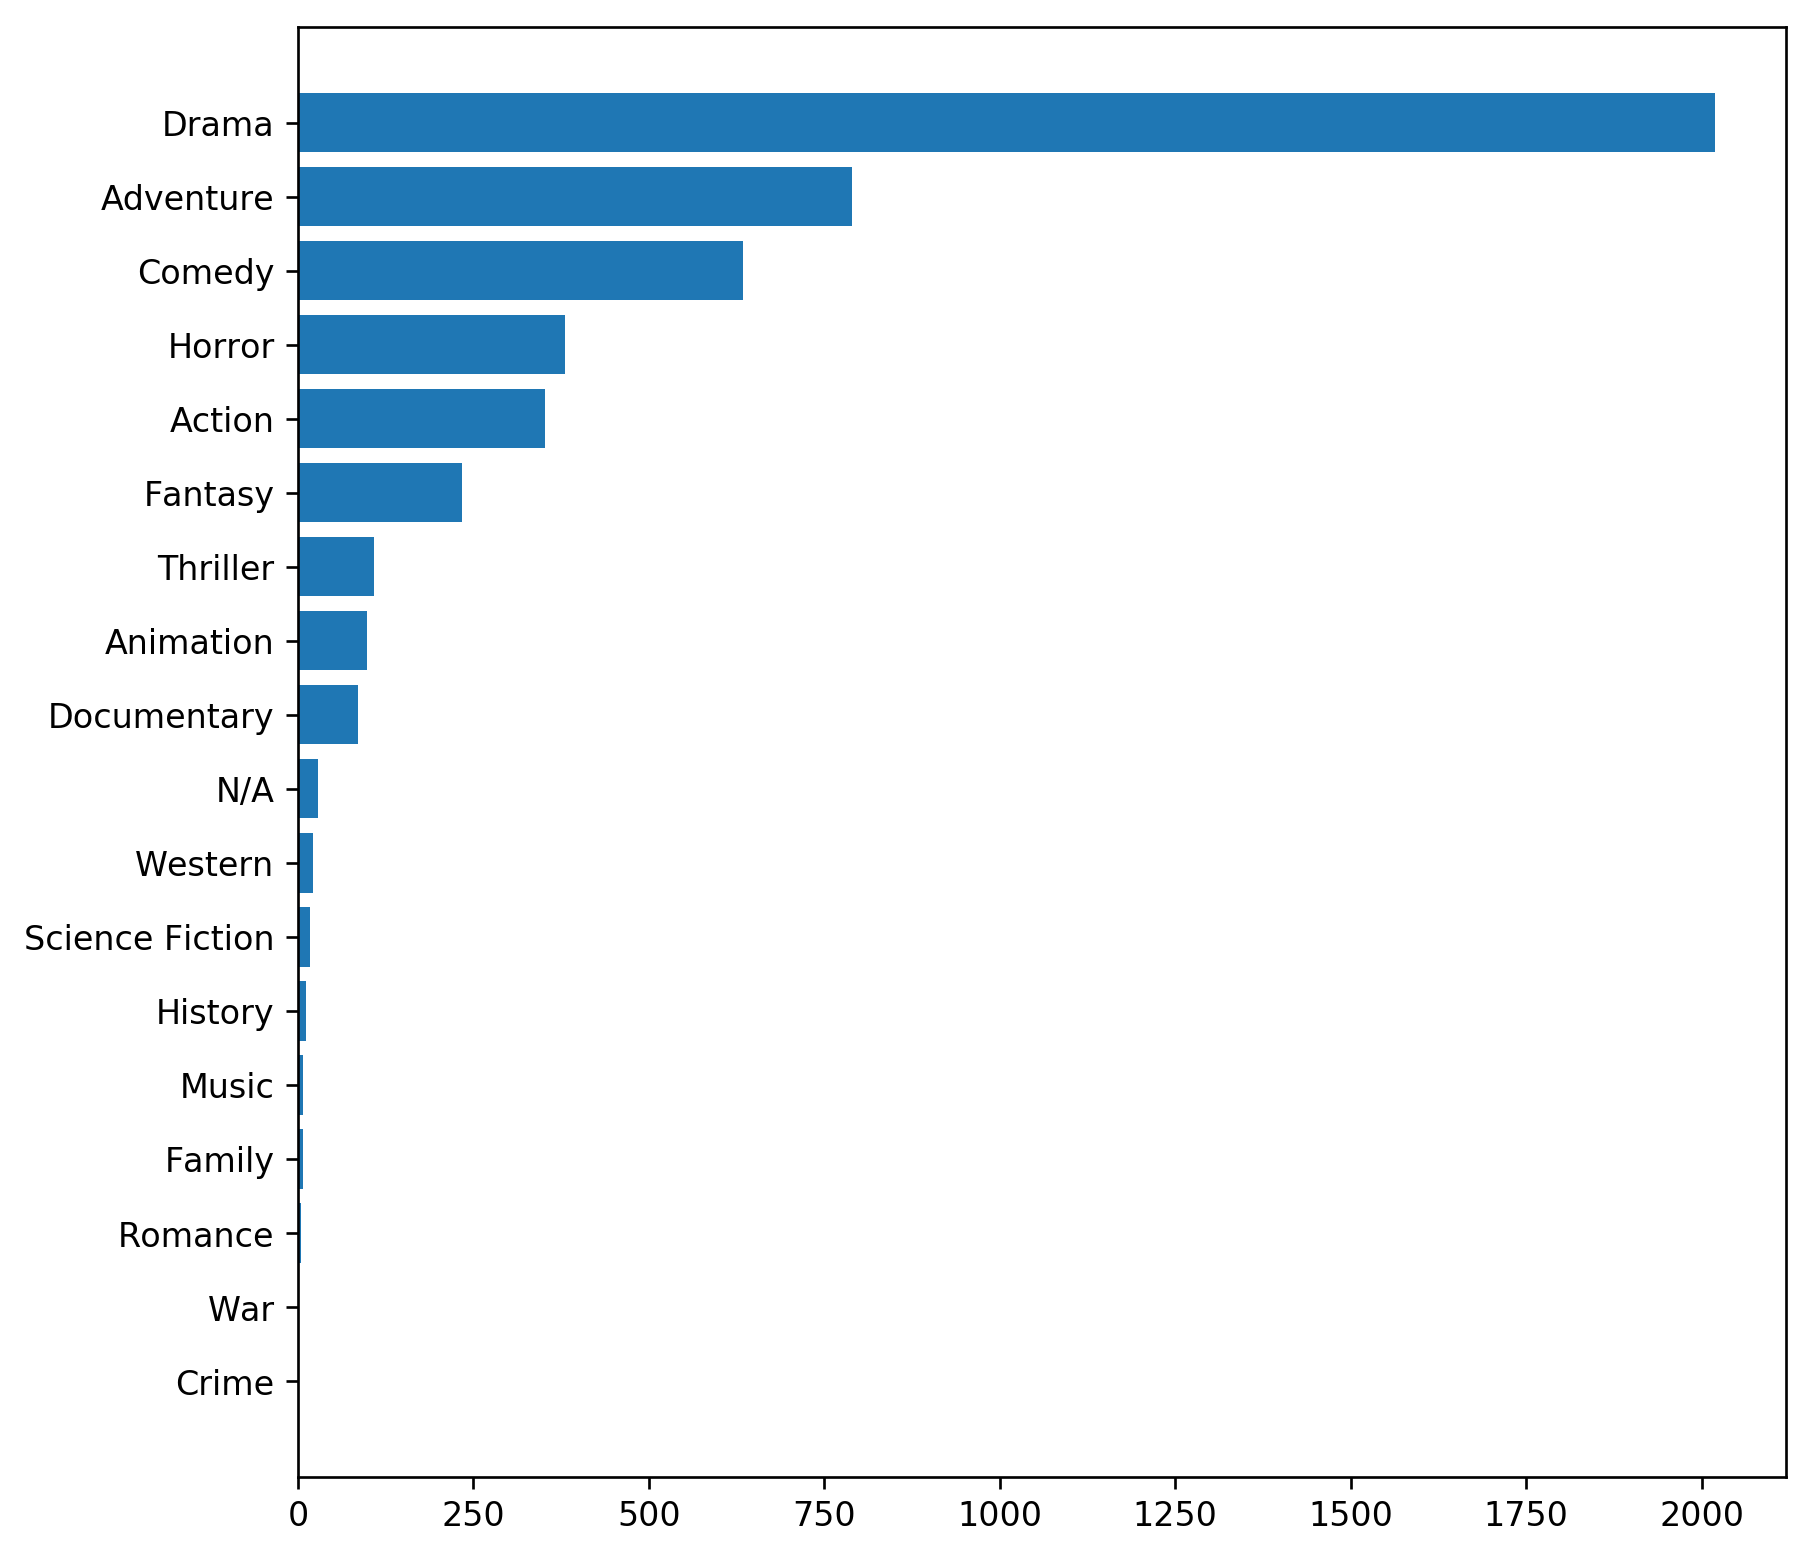

In [15]:
#! Your turn -- use ax.barh to create a horizontal bar chart. Use only one color
fig, ax = plt.subplots(figsize=(8,8), dpi=240)
y = list(range(len(genre_counts)))
ax.barh(
    y,
    genre_counts,
)
ax.set_yticks(y)
ax.set_yticklabels(genre_counts.index)
ax.set_ylim(reversed(ax.get_ylim()))
None

Look at what's important. Let's combine the small genres to a single category.

In [16]:
tmp = pd.DataFrame(genre_counts).rename(columns={'genre': 'n'})
tmp['is_other'] = tmp.n < (tmp.n.sum() * 0.05)
tbl_genres = tmp.loc[~tmp.is_other].copy()[['n']]
tbl_genres.loc['Other'] = dict(n=tmp.loc[tmp.is_other]['n'].sum())
tbl_genres['n'] = tbl_genres['n'].astype(int)
tbl_genres

,n
Drama,2019
Adventure,790
Comedy,634
Horror,381
Action,352
Other,627


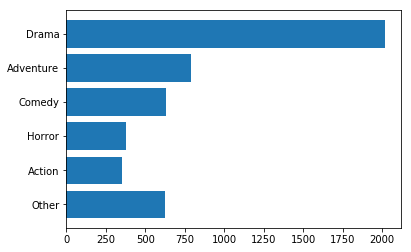

In [17]:
y = list(range(len(tbl_genres)))
fig, ax = plt.subplots()
ax.barh(
    y,
    tbl_genres.n,
)
ax.set_yticks(y)
ax.set_yticklabels(tbl_genres.index)
ax.set_ylim(reversed(ax.get_ylim()))
None

In [18]:
tbl_genres['percent'] = tbl_genres['n'] / tbl_genres['n'].sum() * 100

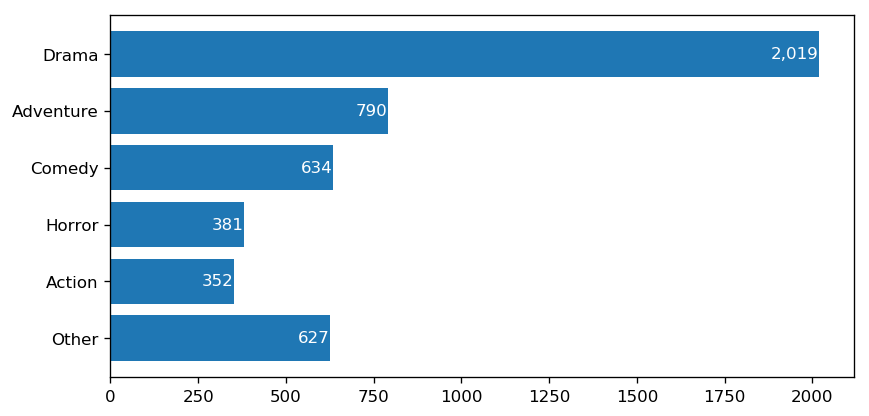

In [20]:
#! text labels
y = list(range(len(tbl_genres)))
fig, ax = plt.subplots(figsize=(8, 4), dpi=120)
ax.barh(
    y,
    tbl_genres.n,
)
ax.set_yticks(y)
ax.set_yticklabels(tbl_genres.index)
ax.set_ylim(reversed(ax.get_ylim()))
for (y, (genre, row)) in enumerate(tbl_genres.iterrows()): #! <-
    ax.text(
        x=row['n'] - 2,
        y=y,
        s='{:,.0f}'.format(row['n']),
        color='white',
        ha='right',
        va='center'
    )
None

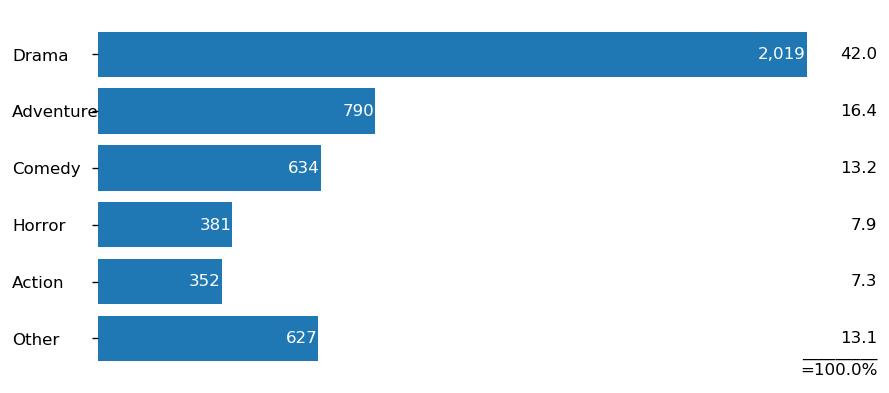

In [22]:
#! summary table 
y = list(range(len(tbl_genres)))
fig, ax = plt.subplots(figsize=(8, 4), dpi=120)
ax.barh(
    y,
    tbl_genres.n,
)
tks = ax.set_yticks(y)
ax.set_yticklabels(tbl_genres.index, ha='left', x=-0.1)
ax.set_ylim(reversed(ax.get_ylim()))
for (y, (genre, row)) in enumerate(tbl_genres.iterrows()):
    ax.text(
        x=row['n'] - 2,
        y=y,
        s='{:,.0f}'.format(row['n']),
        color='white',
        ha='right',
        va='center'
    )
    ax.text( #! <----------------------------
        x=ax.get_xlim()[1] + 100,
        y=y,
        s='{:.1f}'.format(row['percent']),
        ha='right', va='center'
    )
ax.text( #! <----------------------------
    x=ax.get_xlim()[1] + 100,
    y=ax.get_ylim()[0],
    s='_________\n=100.0%',
    ha='right', va='bottom'
)
sns.despine(left=True, bottom=True) #! <----------------------------
ax.set_xticks([]) #! <----------------------------
None

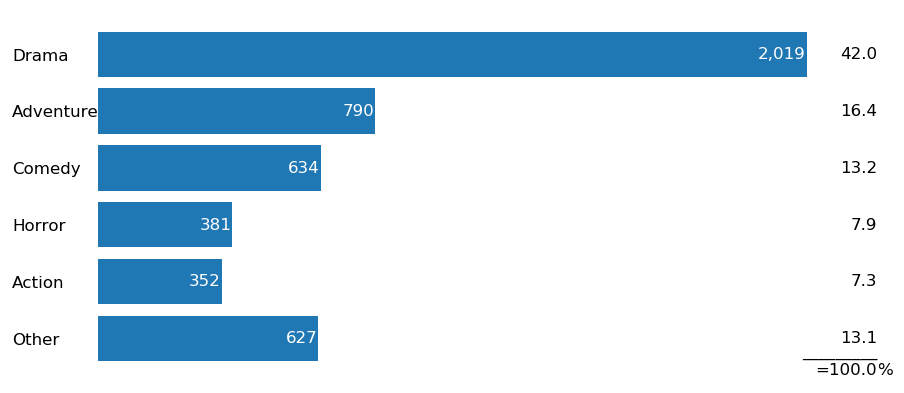

In [23]:
#! better allignment
y = list(range(len(tbl_genres)))
fig, ax = plt.subplots(figsize=(8, 4), dpi=120)
ax.barh(
    y,
    tbl_genres.n,
)
ax.set_yticks(y)
ax.set_yticklabels(tbl_genres.index, ha='left', x=-0.1)
ax.set_ylim(reversed(ax.get_ylim()))
for (y, (genre, row)) in enumerate(tbl_genres.iterrows()):
    ax.text(
        x=row['n'] - 2,
        y=y,
        s='{:,.0f}'.format(row['n']),
        color='white',
        ha='right',
        va='center'
    )
    ax.text(
        x=ax.get_xlim()[1] + 100,
        y=y,
        s='{:.1f}'.format(row['percent']),
        ha='right', va='center'
    )
lbl = ax.text(
    x=ax.get_xlim()[1] + 100,
    y=ax.get_ylim()[0],
    s='_________\n=100.0',
    ha='right', va='bottom'
)
ax.text( #! <------------------------------------------
    x=ax.get_xlim()[1] + 100,
    y=ax.get_ylim()[0],
    s='%',
    ha='left', va='bottom',
    transform=ax.transData
)
sns.despine(left=True, bottom=True)
ax.set_xticks([])
ax.tick_params(which='both', width=0)
None